In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import os
import utilsCM
import numpy as np
import runCV


# Predicting using random weights

### Determine parameters over which to do cross-validation

In [22]:
# datapath = '../../../data-00/'
keyword = {'DNNActvtn','ROIpred'}
# keyword = {'ROIpred'}
layer =  {'conv_5'}
Sub = [1,2,3,4]
ROI = {'EVC','LOC','PPA'}
Keepncomps = list(range(4,44,4))

pretrained_val = True
datapath='../../../data-00/'
savepath = '../../../data-12/' #This needs to change based on step number!
# Ypredict = 'Word2Sense' #Word2Vec or Word2Sense

In [23]:

runCV.runCV_execute(pretrained_val,savepath,Ypredict='Word2Sense',datapath=datapath,keyword=keyword,ROI=ROI,Sub=Sub,layer=layer,Keepncomps=Keepncomps)


PPA (312, 800)
PredictWord2Sense_ROIpred_PPA_conv_5_4PCs
PredictWord2Sense_ROIpred_PPA_conv_5_8PCs
PredictWord2Sense_ROIpred_PPA_conv_5_12PCs
PredictWord2Sense_ROIpred_PPA_conv_5_16PCs
PredictWord2Sense_ROIpred_PPA_conv_5_20PCs
PredictWord2Sense_ROIpred_PPA_conv_5_24PCs
PredictWord2Sense_ROIpred_PPA_conv_5_28PCs
PredictWord2Sense_ROIpred_PPA_conv_5_32PCs
PredictWord2Sense_ROIpred_PPA_conv_5_36PCs
PredictWord2Sense_ROIpred_PPA_conv_5_40PCs
EVC (312, 800)
PredictWord2Sense_ROIpred_EVC_conv_5_4PCs
PredictWord2Sense_ROIpred_EVC_conv_5_8PCs
PredictWord2Sense_ROIpred_EVC_conv_5_12PCs
PredictWord2Sense_ROIpred_EVC_conv_5_16PCs
PredictWord2Sense_ROIpred_EVC_conv_5_20PCs
PredictWord2Sense_ROIpred_EVC_conv_5_24PCs
PredictWord2Sense_ROIpred_EVC_conv_5_28PCs
PredictWord2Sense_ROIpred_EVC_conv_5_32PCs
PredictWord2Sense_ROIpred_EVC_conv_5_36PCs
PredictWord2Sense_ROIpred_EVC_conv_5_40PCs
LOC (312, 793)
PredictWord2Sense_ROIpred_LOC_conv_5_4PCs
PredictWord2Sense_ROIpred_LOC_conv_5_8PCs
PredictWord2Sen

In [35]:
from  matplotlib import pyplot
import seaborn as sns
from pandas import DataFrame as pddf

datapath = '../../../data-12/'
figurepath = '../../../figures-12/'

keyword={'ROIpred','DNNActvtn'}
# pretrained_vec = [True, False]
layer={'conv_5'}

In [36]:
myDict_median,myDict_max,myDict_count,myDict_mean = runCV.buildDict(datapath,figurepath,setbonf = False,Ypredict='Word2Sense',keyword=keyword,ROI = ROI,layer=layer,Keepncomps=Keepncomps)



(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)
(125,)


In [37]:
myDict_count

{'PPA': [100, 119, 120, 120, 118, 118, 120, 120, 120, 118],
 'EVC': [111, 110, 115, 118, 119, 120, 115, 117, 116, 117],
 'LOC': [108, 116, 119, 120, 118, 118, 119, 117, 116, 118],
 'DNNActvtn': [120, 119, 123, 122, 119, 120, 121, 120, 119, 120],
 'PCs': [4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
 'Metric': ['count',
  'count',
  'count',
  'count',
  'count',
  'count',
  'count',
  'count',
  'count',
  'count']}

In [38]:
df_count = pddf.from_dict(myDict_count).set_index('PCs')
df_mean = pddf.from_dict(myDict_mean).set_index('PCs')
df_max = pddf.from_dict(myDict_max).set_index('PCs')
df_median = pddf.from_dict(myDict_median).set_index('PCs')

In [39]:
allvalues = pd.concat([df_count, df_mean,df_max,df_median], axis=0)

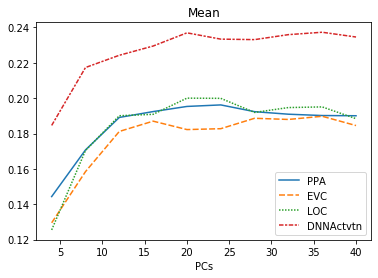

In [43]:
import matplotlib.pyplot as plt

sns.lineplot(data= allvalues[allvalues['Metric'] == 'mean'].iloc[:,0:4]).set_title('Mean')
plt.savefig(figurepath + "Mean.png")

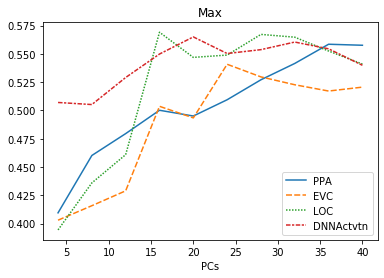

In [44]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'max'].iloc[:,0:4]).set_title('Max')
plt.savefig(figurepath + "Max.png")

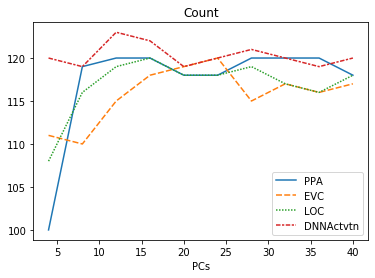

In [45]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'count'].iloc[:,0:4]).set_title('Count')
plt.savefig(figurepath + "Count.png")

In [ ]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'median'].iloc[:,0:2]).set_title('Median')
plt.savefig(figurepath + "Median.png")